In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

net_df = pd.read_excel("ai_competition_train.xlsx", index_col="date", parse_dates=True)
# net_df = net_df.interpolate()
net_df.tail()
net_df.plot()

In [ ]:
# test_data = pd.read_excel("ai_competition_test.xlsx")#, index_col="date", parse_dates=True)
# # np.array(test_data["flux"])[0]
# test_data['date'] = pd.date_range(start='1/1/2023', periods=len(test_data), freq='D')
# test_data.to_excel("ai_competition_test_edited.xlsx")

In [ ]:
# net_df[["flux"]].plot()
start = 0
next = 0
while True:
    net_df[["flux"]][start + next * 90:start + next * 90 + 90].plot()
    next += 1
    inp = input("next")
    if inp == 'q':
        break
# net_df

,flux
date,
2008-01-01,94.800
2008-01-02,96.930
2008-01-03,97.710
2008-01-04,90.090
2008-01-05,90.740
...,...
2022-12-26,111.241
2022-12-27,120.425
2022-12-28,125.205


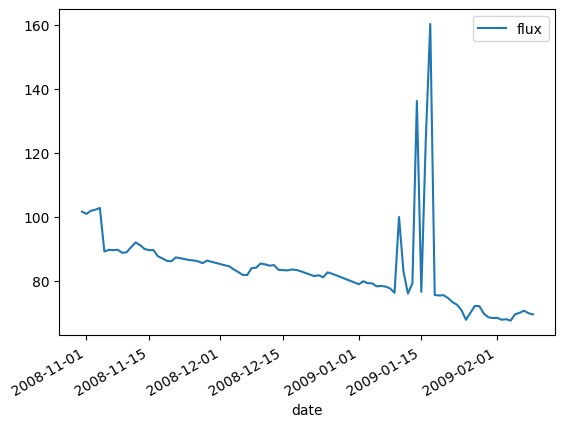

In [5]:
net_df = net_df.dropna(axis=0)
start = 0
next = 3
net_df[["flux"]][start + next * 90:start + next * 90 + 90].plot()
net_df

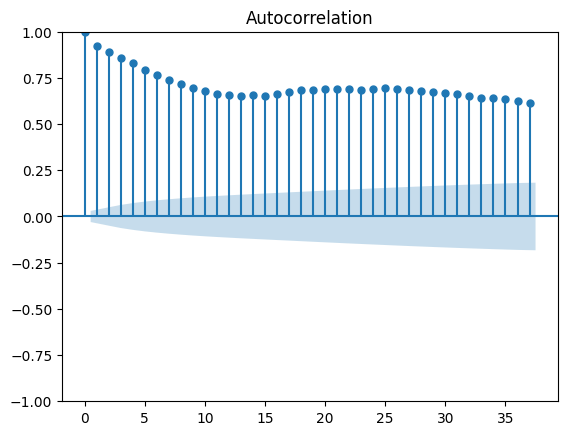

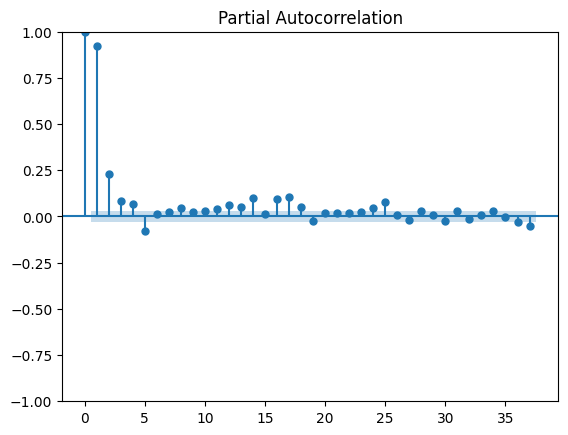

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(net_df)
plot_pacf(net_df)
plt.show()

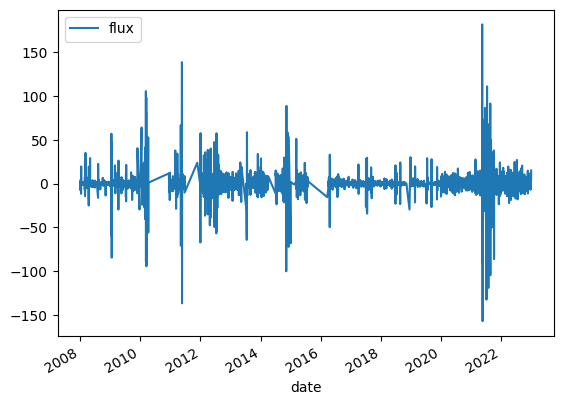

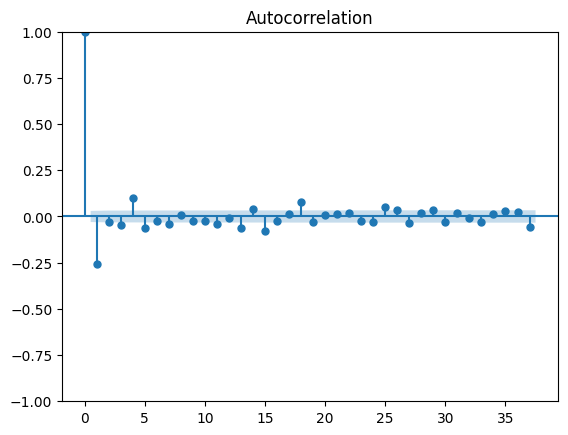

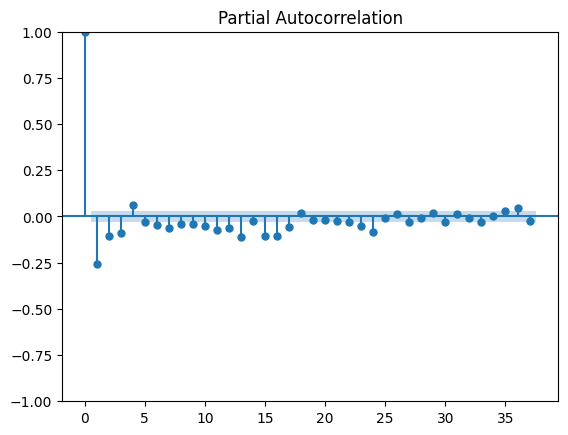

In [7]:
diff_1=net_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
# # Find optimal param
# import itertools
# from tqdm import tqdm
#
# p=d=q=range(0,5)
# pdq = list(itertools.product(p,d,q))
# min_param_aic = np.inf
# min_param = None
#
# history = [x for x in net_df['flux']]
# for param in tqdm(pdq):
#     try:
#         model_arima = ARIMA(history, order=param)
#         model_arima_fit = model_arima.fit()
#         if min_param_aic > model_arima_fit.aic:
#             min_param = param
#             min_param_aic = model_arima_fit.aic
#             print(param, model_arima_fit.aic)
#     except:
#         continue
# print("Min:", min_param, min_param_aic)

In [8]:
# Make model
train_data, test_data = net_df[0:int(len(net_df)*0.9)], net_df[int(len(net_df)*0.9):]
# train_data = pd.read_excel("ai_competition_train.xlsx", index_col="date", parse_dates=True)
# train_data = train_data.interpolate()
# test_data = pd.read_excel("ai_competition_test_edited.xlsx", index_col="date", parse_dates=True)

train_arima = train_data['flux']
test_arima = test_data['flux']

history = [x for x in train_arima]
y = np.array(test_arima)
# make first prediction
predictions = list()
model = ARIMA(history, order=(2,1,4)) # 4,1,4
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
# history.append(y[0])
history.append(yhat)

In [9]:
# rolling forecasts
for i in tqdm(range(1, len(y))):
    # predict
    model = ARIMA(history, order=(2,1,4))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    # history.append(obs)
    history.append(yhat)

 18%|█▊        | 75/422 [02:34<11:47,  2.04s/it]/home/tidy/PycharmProjects/space_sun/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 21%|██▏       | 90/422 [03:05<12:04,  2.18s/it]/home/tidy/PycharmProjects/space_sun/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 52%|█████▏    | 218/422 [07:39<07:27,  2.19s/it]/home/tidy/PycharmProjects/space_sun/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 57%|█████▋    | 240/422 [08:29<07:15,  2.39s/it]/home/tidy/PycharmProjects/space_sun/venv/lib/pyth

In [10]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 494.96159409824594
MAE: 18.8312776380795
RMSE: 22.24773233608868


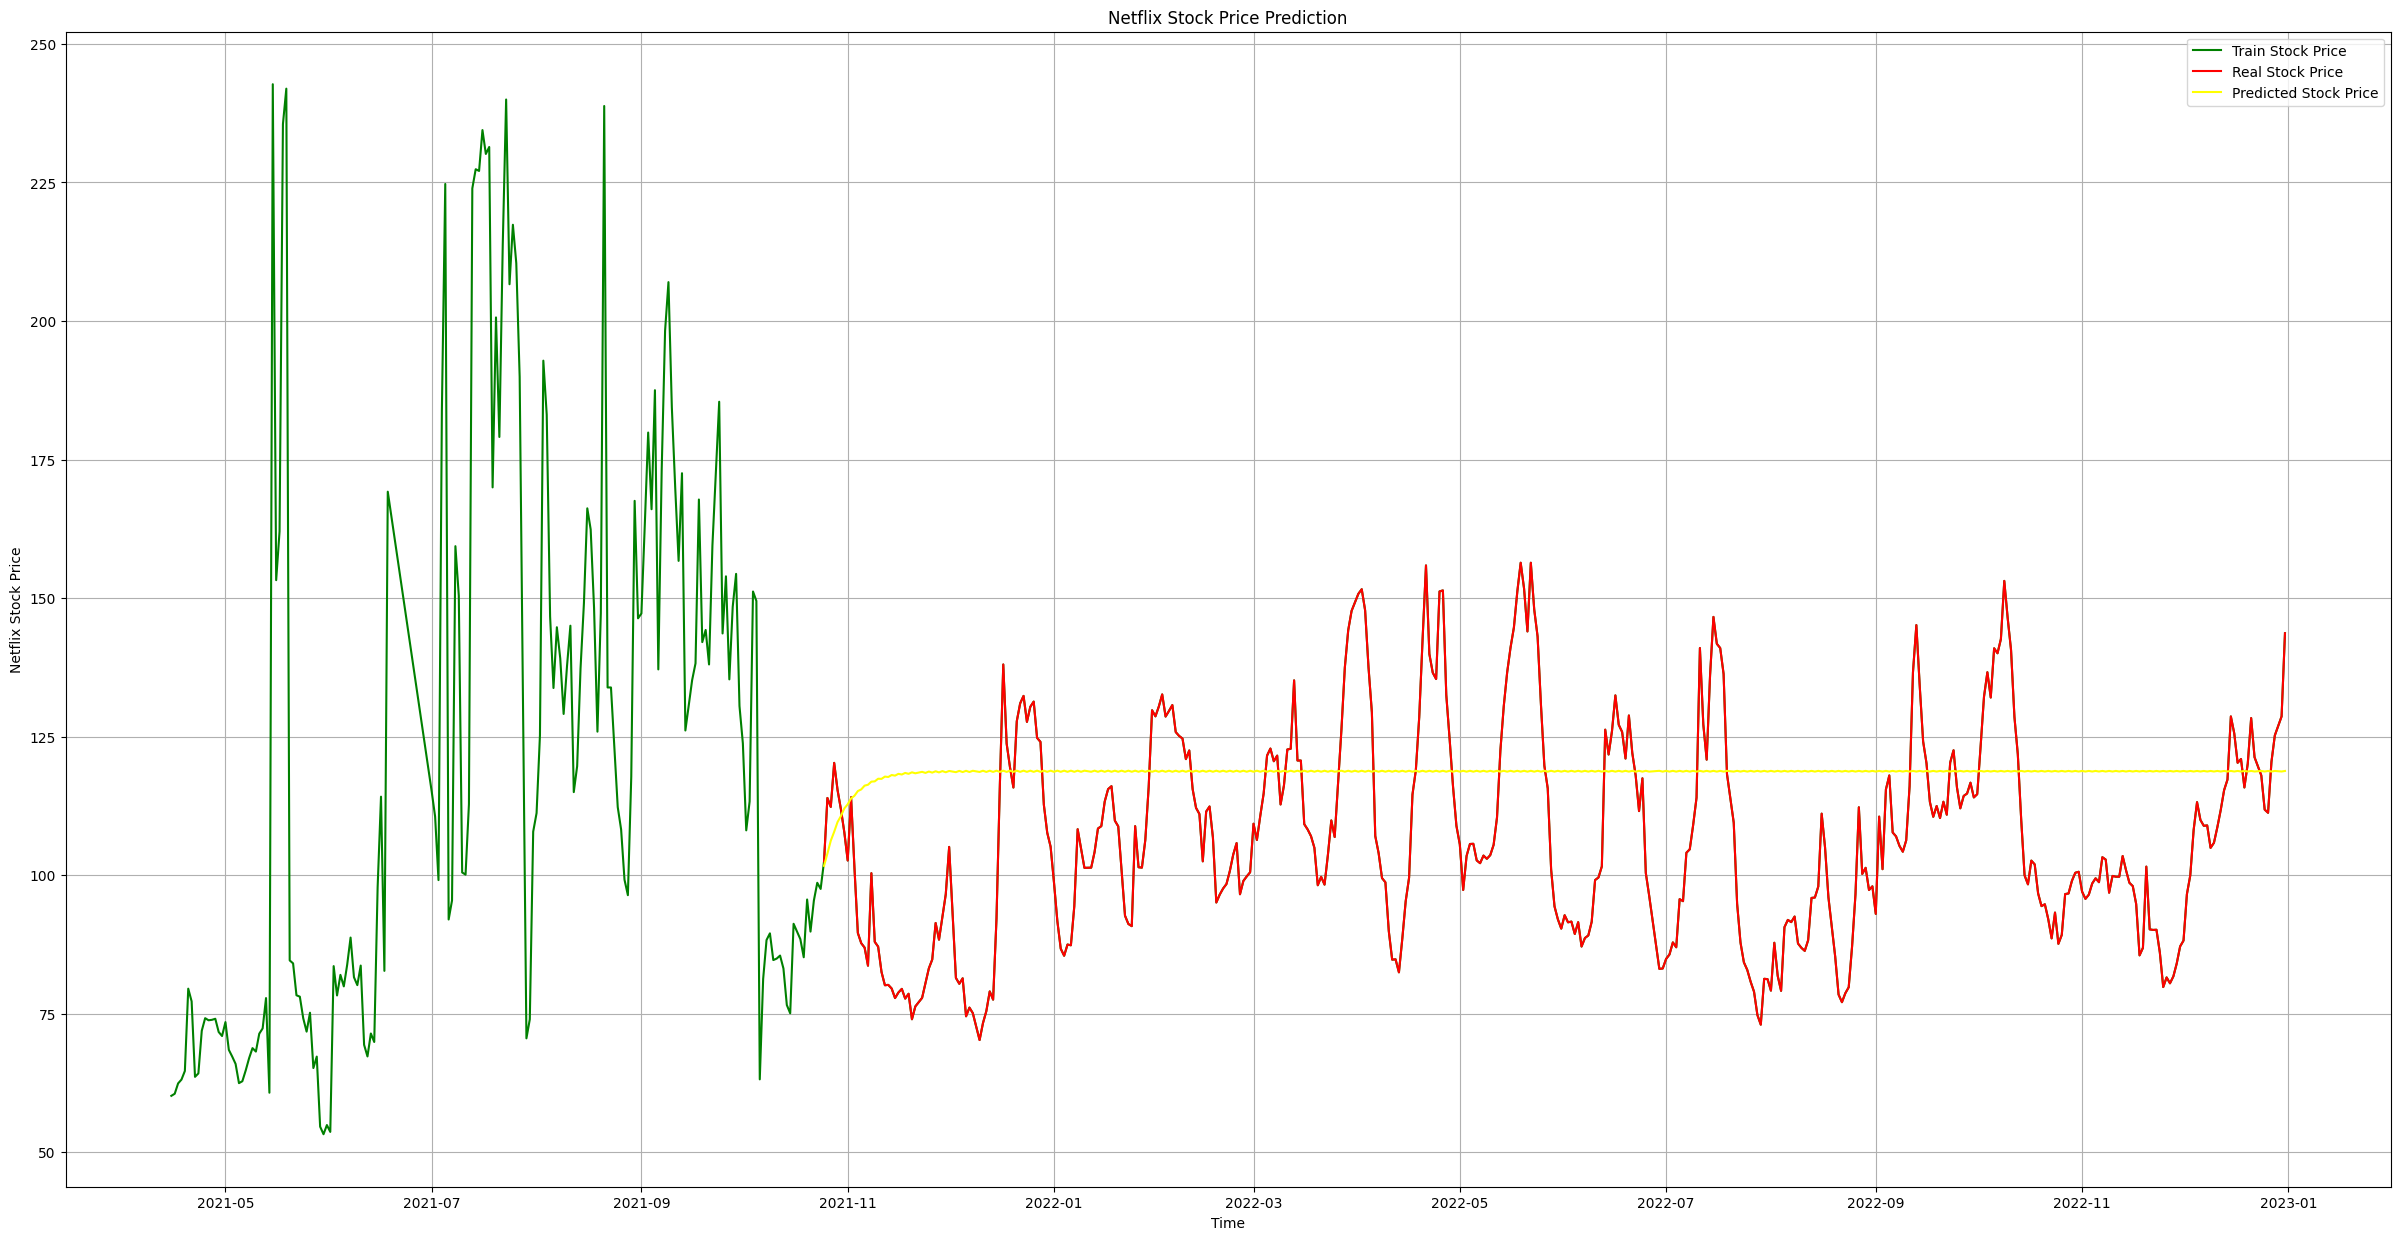

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.plot(net_df.index[-600:], net_df['flux'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'yellow', label = 'Predicted Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

In [12]:
yhattest_data = pd.read_excel("ai_competition_test_edited.xlsx", index_col="date", parse_dates=True)

history = [x for x in test_data["flux"]]
# make first prediction
model = ARIMA(history, order=(2,1,4)) # 4,1,4
model_fit = model.fit()
ans = model_fit.forecast(steps=30)
ans

/home/tidy/PycharmProjects/space_sun/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([145.56229319, 146.91718883, 148.00643611, 148.58885728,
       148.64859917, 148.19939389, 147.2828298 , 145.96512968,
       144.33266411, 142.48649067, 140.53625453, 138.59381054,
       136.76693048, 135.15344272, 133.83611609, 132.8785482 ,
       132.3222541 , 132.18507804, 132.46097339, 133.1211185 ,
       134.11626271, 135.38013187, 136.8336696 , 138.38985092,
       139.95878204, 141.45279326, 142.79124203, 143.90476844,
       144.73878445, 145.25602774])

In [ ]:
# predict forecast
ans = model_fit.forecast(steps=30)
print(ans)

In [ ]:
print(model_fit.summary())